In [152]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [153]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\datos_finales.csv"
# Load the Excel file into a DataFrame
df = pd.read_csv(excel_file_path)
# Display the DataFrame
df.head()

company_name    Ticker1  \
0                            JPMorgan Chase        JPM   
1  Saudi Arabian Oil Company (Saudi Aramco)    2222.SR   
2                                      ICBC  601398.SS   
3                   China Construction Bank  601939.SS   
4                Agricultural Bank of China  601288.SS   

                                            Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   ...  Revenue Growth (y/o/y)  Total Cash Per Share  Total Debt/Equity  \
0  ...                   0.111               493.447                NaN   
1  ...                  -0.057                 1.592             16.704   
2  ...                  -0.021                16.785                NaN   
3  ...                   0.035                 9.131                NaN   
4  ...                   0.036                17.970                NaN   

   Current Ratio  Market Cap USD  EBITDA (ttm) USD  Total Cash USD  \
0            NaN      573.366403               NaN     1421.310034   
1          2.304     2000.500446        252.159417      102.104232   
2            NaN      253.621212               NaN      879.387100   
3            NaN      167.292783               NaN      335.591449   
4            NaN      208.051584               NaN      924.515327   

   Total Debt USD                                       segment_list  \
0      731.371995  ['Consumer and Community Banking', 'Corporate ...   
1       76.894523        ['Upstream', 'Downstream', 'and Corporate']   
2      335.063440  ['Corporate Banking', 'Personal Banking', 'Tre...   
3      471.762979  ['Corporate Banking', 'Personal Banking', 'Tre...   
4      544.144009  ['Corporate Banking', 'Personal Banking', 'Tre...   

                      business_segments_homologation  
0  Investment Banking, Asset Management, Commerci...  
1  Upstream Oil and Gas, Downstream Oil and Gas, ...  
2  Corporate Banking, Personal Banking, Asset Man...  
3  Corporate Banking, Personal Banking, Investmen...  
4  Corporate Banking, Personal Banking, Agricultu...  

[5 rows x 32 columns]

labels
Asset Management                   133
Renewable Energy                   108
Investment Banking                 101
Digital Banking                     88
Retail Banking                      88
                                  ... 
Food Delivery                        1
Intelligent Logistics Solutions      1
Automotive Parts                     1
Paints                               1
Trust Banking                        1
Name: count, Length: 2514, dtype: int64


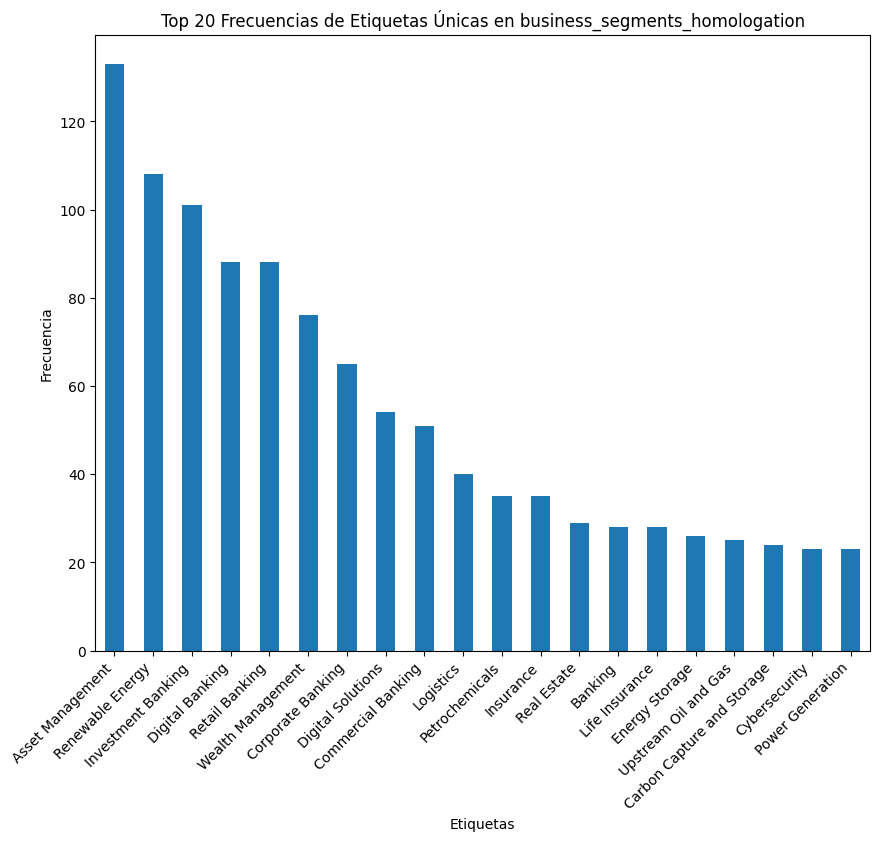

In [154]:
# Asegurarse que la columna de etiquetas sea de tipo string
df['business_segments_homologation'] = df['business_segments_homologation'].astype(str)

# Separar las etiquetas y expandirlas en una lista
df['labels'] = df['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear una serie con todas las etiquetas
all_labels = df['labels'].explode()

# Contar la frecuencia de cada etiqueta
label_counts = all_labels.value_counts()

# Mostrar la tabla de frecuencias ordenada
print(label_counts)

# Graficar las 20 etiquetas más frecuentes
plt.figure(figsize=(10, 8))
label_counts.head(20).plot(kind='bar')
plt.title('Top 20 Frecuencias de Etiquetas Únicas en business_segments_homologation')
plt.xlabel('Etiquetas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

# Exploración de datos:

primero debemos realizar una exploración inicial para entender la estructura del conjunto de datos, revisar los datos nulos y determinar qué columnas no son relevantes para el análisis.
Vamos a cargar el archivo datos_finales.csv, visualizar las primeras filas, revisar la presencia de datos nulos y obtener una descripción general de las columnas.

In [155]:
# Mostrar las primeras filas del DataFrame
df.head(), df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company_name                    1099 non-null   object 
 1   Ticker1                         1099 non-null   object 
 2   Industry                        1096 non-null   object 
 3   Country/Territory               1099 non-null   object 
 4   Employees                       1070 non-null   float64
 5   Revenue                         1099 non-null   float64
 6   Assets                          1098 non-null   float64
 7   Profits                         1098 non-null   float64
 8   Sector                          1099 non-null   object 
 9   P/E Ratio (ttm)                 1010 non-null   float64
 10  Forward P/E                     1080 non-null   float64
 11  Diluted EPS (ttm)               1068 non-null   float64
 12  Dividends Per Share             98

c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\sjess\Identificaci-n-de-Segmentos-de-Negocio\trabajo-grados\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


(                               company_name    Ticker1  \
 0                            JPMorgan Chase        JPM   
 1  Saudi Arabian Oil Company (Saudi Aramco)    2222.SR   
 2                                      ICBC  601398.SS   
 3                   China Construction Bank  601939.SS   
 4                Agricultural Bank of China  601288.SS   
 
                                             Industry Country/Territory  \
 0                     Banking and Financial Services     United States   
 1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
 2                     Banking and Financial Services             China   
 3                                            Banking             China   
 4                     Banking and Financial Services             China   
 
    Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
 0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
 1    70000.0    589.5   661.0  

In [156]:
# Reemplazar valores específicos en la columna Industry
industry_replacements = {
    'WTW': 'Banking and Financial Services',
    'American Financial Group': 'Banking and Financial Services',
    'Lennar': 'Construction'
}
df.loc[df['company_name'] == 'WTW', 'Industry'] = industry_replacements['WTW']
df.loc[df['company_name'] == 'American Financial Group', 'Industry'] = industry_replacements['American Financial Group']
df.loc[df['company_name'] == 'Lennar', 'Industry'] = industry_replacements['Lennar']


# Eliminar columnas irrelevantes
columns_to_drop = ['company_name', 'Ticker1', 'segment_list','labels']
df_cleaned = df.drop(columns=columns_to_drop)

In [157]:
# Reemplazar valores infinitos por NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Crear un pipeline para manejar los datos nulos en las columnas numéricas
numeric_features = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Aplicar el pipeline a las columnas numéricas
df_cleaned[numeric_features] = numeric_transformer.fit_transform(df_cleaned[numeric_features])

# Verificar la limpieza de los datos
null_counts = df_cleaned.isnull().sum()

# Mostrar las primeras filas del DataFrame limpio y el conteo de valores nulos restantes
print(df_cleaned.head())
print(null_counts)

                                            Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Revenue Per Share (ttm)  \
0    12.22727

In [158]:
df_cleaned.head()

Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Revenue Per Share (ttm)  \
0    12.227272              16.24  ...                   49.687   
1    16.956522               1.87  ...                    7.673   
2     5.117647               0.97  ...                    0.714   
3     4.934307               1.31  ...                    2.715   
4     5.376623               0.71  ...                    1.673   

   Revenue Growth (y/o/y)  Total Cash Per Share  Total Debt/Equity  \
0                   0.111               493.447            72.5415   
1                  -0.057                 1.592            16.7040   
2                  -0.021                16.785            72.5415   
3                   0.035                 9.131            72.5415   
4                   0.036                17.970            72.5415   

   Current Ratio  Market Cap USD  EBITDA (ttm) USD  Total Cash USD  \
0          1.299      573.366403          3.499280     1421.310034   
1          2.304     2000.500446        252.159417      102.104232   
2          1.299      253.621212          3.499280      879.387100   
3          1.299      167.292783          3.499280      335.591449   
4          1.299      208.051584          3.499280      924.515327   

   Total Debt USD                     business_segments_homologation  
0      731.371995  Investment Banking, Asset Management, Commerci...  
1       76.894523  Upstream Oil and Gas, Downstream Oil and Gas, ...  
2      335.063440  Corporate Banking, Personal Banking, Asset Man...  
3      471.762979  Corporate Banking, Personal Banking, Investmen...  
4      544.144009  Corporate Banking, Personal Banking, Agricultu...  

[5 rows x 29 columns]

In [159]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

In [37]:
# Separar características y etiquetas
X = df_cleaned.drop(columns=['business_segments_homologation'])
y = df_cleaned['business_segments_homologation']

# Asegurarnos de que y no contiene valores nulos y convertir a cadenas de texto
y = y.dropna().astype(str)

# Convertir etiquetas a formato binario
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(y.str.split(', '))

# Convertir las columnas categóricas a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))



Binary Relevance (BR) - Accuracy: 0.0136, Hamming Loss: 0.0018, F1 Score: 0.1761
Classifier Chains (CC) - Accuracy: 0.0318, Hamming Loss: 0.0018, F1 Score: 0.1446


In [160]:
# Dividir las etiquetas de 'business_segments_homologation'
df_cleaned['business_segments_homologation'] = df_cleaned['business_segments_homologation'].apply(lambda x: x.split(', '))

# Crear nuevas columnas para las tres primeras etiquetas
df_cleaned['label_1'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[0] if len(x) > 0 else None)
df_cleaned['label_2'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[1] if len(x) > 1 else None)
df_cleaned['label_3'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[2] if len(x) > 2 else None)

# Crear una nueva columna para las etiquetas restantes
df_cleaned['remaining_labels'] = df_cleaned['business_segments_homologation'].apply(lambda x: x[3:] if len(x) > 3 else [])

# Mantener solo las columnas relevantes
df_new = df_cleaned.drop(columns=['business_segments_homologation'])

# Mostrar las primeras filas del nuevo DataFrame
df_new.head()

Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Total Debt/Equity  Current Ratio  \
0    12.227272              16.24  ...            72.5415          1.299   
1    16.956522               1.87  ...            16.7040          2.304   
2     5.117647               0.97  ...            72.5415          1.299   
3     4.934307               1.31  ...            72.5415          1.299   
4     5.376623               0.71  ...            72.5415          1.299   

   Market Cap USD  EBITDA (ttm) USD  Total Cash USD  Total Debt USD  \
0      573.366403          3.499280     1421.310034      731.371995   
1     2000.500446        252.159417      102.104232       76.894523   
2      253.621212          3.499280      879.387100      335.063440   
3      167.292783          3.499280      335.591449      471.762979   
4      208.051584          3.499280      924.515327      544.144009   

                label_1                 label_2               label_3  \
0    Investment Banking        Asset Management    Commercial Banking   
1  Upstream Oil and Gas  Downstream Oil and Gas        Petrochemicals   
2     Corporate Banking        Personal Banking      Asset Management   
3     Corporate Banking        Personal Banking    Investment Banking   
4     Corporate Banking        Personal Banking  Agricultural Finance   

                                    remaining_labels  
0  [Consumer Banking, Digital Banking, Cryptocurr...  
1                 [Renewable Energy, Energy Storage]  
2             [Investment Banking, Fintech Services]  
3                [Asset Management, Digital Banking]  
4              [Rural Development, Fintech Services]  

[5 rows x 32 columns]

In [48]:
# Convertir las tres primeras etiquetas a variables dummy
df_new = pd.get_dummies(df_new, columns=['label_1', 'label_2', 'label_3'])

# Convertir las etiquetas restantes a formato binario
mlb = MultiLabelBinarizer()
remaining_labels_binary = mlb.fit_transform(df_new['remaining_labels'])

# Convertir el array binario a DataFrame y agregar al DataFrame original
remaining_labels_df = pd.DataFrame(remaining_labels_binary, columns=mlb.classes_, index=df_new.index)
df_final = pd.concat([df_new.drop(columns=['remaining_labels']), remaining_labels_df], axis=1)

# Mostrar las primeras filas del DataFrame final
df_final.head()

Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Wearables  \
0    12.227272              16.24  ...          0   
1    16.956522               1.87  ...          0   
2     5.117647               0.97  ...          0   
3     4.934307               1.31  ...          0   
4     5.376623               0.71  ...          0   

   Webscale Routing and Automation  Wildfire Prevention  Wine  Wine Tourism  \
0                                0                    0     0             0   
1                                0                    0     0             0   
2                                0                    0     0             0   
3                                0                    0     0             0   
4                                0                    0     0             0   

   Wireless Communications  Wireless Telecommunications  Zinc Mining  \
0                        0                            0            0   
1                        0                            0            0   
2                        0                            0            0   
3                        0                            0            0   
4                        0                            0            0   

   eMobility Solutions  iGaming  
0                    0        0  
1                    0        0  
2                    0        0  
3                    0        0  
4                    0        0  

[5 rows x 3064 columns]

In [49]:
# Separar características y etiquetas
X = df_final.drop(columns=mlb.classes_.tolist())
y = df_final[mlb.classes_.tolist()]

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(879, 2041) (220, 2041) (879, 1141) (220, 1141)


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from sklearn.preprocessing import MultiLabelBinarizer

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))


Binary Relevance (BR) - Accuracy: 0.0909, Hamming Loss: 0.0015, F1 Score: 0.1630
Classifier Chains (CC) - Accuracy: 0.0909, Hamming Loss: 0.0015, F1 Score: 0.1674


In [91]:
# Concatenar todas las listas de etiquetas en 'remaining_labels' y obtener las etiquetas únicas
remaining_labels_series = df_new['remaining_labels'].explode()
unique_labels = remaining_labels_series.unique()

# Mostrar las primeras 10 etiquetas únicas para ver el formato
unique_labels[:10]

array(['Consumer Banking', 'Digital Banking', 'Cryptocurrency Services',
       'Renewable Energy', 'Energy Storage', 'Investment Banking',
       'Fintech Services', 'Asset Management', 'Rural Development',
       'Commercial Banking'], dtype=object)

In [93]:
# Convertir a DataFrame y guardar en formato CSV
unique_labels_df = pd.DataFrame(list(unique_labels), columns=['Label'])
file_path_unique_labels = 'C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\labels_unicos.csv'
unique_labels_df.to_csv(file_path_unique_labels, index=False)

In [103]:
unique_labels_df

Label
0                 consumer banking
1                  digital banking
2          cryptocurrency services
3                 renewable energy
4                   energy storage
...                            ...
1136        new energy initiatives
1137               payment systems
1138  new financial infrastructure
1140         trading and brokerage
1141                 trust banking

[1094 rows x 1 columns]

In [135]:
# Specify the path to your Excel file
excel_file_path = "C:\\Users\\sjess\\Identificaci-n-de-Segmentos-de-Negocio\\data\\processed\\labels_unicos.csv"
# Load the Excel file into a DataFrame
labels_data = pd.read_csv(excel_file_path, sep=';')
# Display the DataFrame
labels_data.head()

ID                    Label  \
0   1         Consumer Banking   
1   2          Digital Banking   
2   3  Cryptocurrency Services   
3   4         Renewable Energy   
4   5           Energy Storage   

                                          Definition  
0   Banking services for individual customers, in...  
1   Online and mobile banking services allowing c...  
2   Financial services related to digital currenc...  
3   Production of energy from sustainable sources...  
4   Technologies for storing energy, such as batt...

In [143]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Combinar el nombre y la descripción en una sola columna para el análisis
combined_text = labels_data['Label'] + " " + labels_data['Definition']

# Inicializar TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

# Transformar los textos en vectores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Aplicar PCA para reducir la dimensionalidad a 50 componentes principales
pca = PCA(n_components=50)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Aplicar Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5)
agg_cluster_labels = agg_cluster.fit_predict(reduced_data)

# Crear un DataFrame para ver los resultados del clustering
agg_cluster_results = pd.DataFrame({
    'ID': labels_data['ID'],
    'Label': labels_data['Label'],
    'Cluster': agg_cluster_labels
})

# Agrupar los resultados por cluster para ver la distribución completa
cluster_summary = agg_cluster_results.groupby('Cluster')['ID'].apply(list).reset_index()

# Guardar el resumen de clusters en un archivo CSV
cluster_summary.to_csv('cluster_summary.csv', index=False)

# Mostrar los primeros 10 resultados del clustering
print(agg_cluster_results.head(10))
print(cluster_summary.head(10))


   ID                    Label  Cluster
0   1         Consumer Banking       49
1   2          Digital Banking       49
2   3  Cryptocurrency Services       23
3   4         Renewable Energy       43
4   5           Energy Storage        0
5   6       Investment Banking       49
6   7         Fintech Services       23
7   8         Asset Management       37
8   9        Rural Development       53
9  10       Commercial Banking       49
   Cluster                                                 ID
0        0  [5, 103, 110, 131, 133, 161, 321, 369, 370, 41...
1        1  [123, 157, 173, 213, 245, 324, 361, 411, 500, ...
2        2  [29, 48, 70, 98, 139, 148, 158, 182, 197, 204,...
3        3  [53, 374, 385, 420, 438, 490, 521, 570, 584, 6...
4        4  [33, 100, 120, 126, 183, 184, 188, 222, 289, 2...
5        5  [42, 79, 149, 172, 247, 371, 519, 527, 650, 70...
6        6  [56, 95, 116, 302, 305, 323, 325, 440, 444, 45...
7        7  [94, 121, 175, 282, 318, 332, 353, 362, 450, 5...
8 

In [170]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD

# Combinar el nombre y la descripción en una sola columna para el análisis
combined_text = labels_data['Label'] + " " + labels_data['Definition']

# Inicializar TF-IDF Vectorizer con parámetros refinados
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=2000, ngram_range=(1,2))

# Transformar los textos en vectores TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

# Aplicar TruncatedSVD para reducir la dimensionalidad
svd = TruncatedSVD(n_components=50)
reduced_data = svd.fit_transform(tfidf_matrix)

# Aplicar Agglomerative Clustering con parámetros refinados
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=1.0, linkage='ward')
agg_cluster_labels = agg_cluster.fit_predict(reduced_data)

# Crear un DataFrame para ver los resultados del clustering
agg_cluster_results = pd.DataFrame({
    'ID': labels_data['ID'],
    'Label': labels_data['Label'],
    'Cluster': agg_cluster_labels
})

# Agrupar los resultados por cluster y por nombre de label
cluster_summary = agg_cluster_results.groupby('Cluster')['Label'].apply(list).reset_index()

# Guardar el resumen de clusters en un archivo CSV
cluster_summary.to_csv('cluster_summary_by_label.csv', index=False)

# Mostrar los primeros 10 resultados del clustering
print(agg_cluster_results.head(10))
print(cluster_summary.head(10))

   ID                    Label  Cluster
0   1         Consumer Banking       64
1   2          Digital Banking       64
2   3  Cryptocurrency Services       10
3   4         Renewable Energy       50
4   5           Energy Storage       49
5   6       Investment Banking       10
6   7         Fintech Services       10
7   8         Asset Management       80
8   9        Rural Development       55
9  10       Commercial Banking       64
   Cluster                                              Label
0        0  [Hydrogen Fuel Cells, Hydrogen Production, Har...
1        1  [Ride-sharing, Mobility, Mobility Services, Mo...
2        2  [Safety and Productivity Solutions, Smart Home...
3        3  [Autonomous Vehicles, Autonomous Driving, Comm...
4        4  [Digital Insurance, Insurance, Reinsurance, Co...
5        5  [Healthcare Logistics, Blockchain-enabled Supp...
6        6  [Sustainable Materials, Battery Materials, Adv...
7        7  [Intelligent Manufacturing, Webscale Routing a...
8 

In [171]:
cluster_summary

Cluster                                              Label
0         0  [Hydrogen Fuel Cells, Hydrogen Production, Har...
1         1  [Ride-sharing, Mobility, Mobility Services, Mo...
2         2  [Safety and Productivity Solutions, Smart Home...
3         3  [Autonomous Vehicles, Autonomous Driving, Comm...
4         4  [Digital Insurance, Insurance, Reinsurance, Co...
..      ...                                                ...
87       87  [Building and Industrial Materials, Industrial...
88       88  [Healthcare Services, Outpatient Clinics, Hosp...
89       89  [E-commerce, E-commerce , Online Retail, E-Com...
90       90  [Internet of Things, Wireless Telecommunicatio...
91       91  [Mobile Telecommunications, Internet and Commu...

[92 rows x 2 columns]

In [181]:
# Crear un diccionario que mapee cada etiqueta a su cluster
label_to_cluster = agg_cluster_results.set_index('Label')['Cluster'].to_dict()

# Crear una copia del DataFrame
df_new_2 = df_new.copy()

# Función para reemplazar las etiquetas por sus clusters
def replace_labels_with_clusters(labels):
    return [label_to_cluster[label] for label in labels if label in label_to_cluster]

# Reemplazar las etiquetas en 'remaining_labels' por los clusters correspondientes
df_new_2['remaining_labels_clusters'] = df_new_2['remaining_labels'].apply(replace_labels_with_clusters)

# Mostrar las primeras filas del DataFrame actualizado
df_new_2.head()

Industry Country/Territory  \
0                     Banking and Financial Services     United States   
1  Construction, Oil & Gas Operations, Mining and...      Saudi Arabia   
2                     Banking and Financial Services             China   
3                                            Banking             China   
4                     Banking and Financial Services             China   

   Employees  Revenue  Assets  Profits              Sector  P/E Ratio (ttm)  \
0   293723.0    179.9  3700.0     41.8  Financial Services        12.257389   
1    70000.0    589.5   661.0    156.4              Energy        16.684492   
2   427587.0    216.8  6100.0     52.5  Financial Services         5.381443   
3   352588.0    203.1  5000.0     48.3  Financial Services         5.160306   
4   459000.0    186.1  5400.0     37.9  Financial Services         5.830986   

   Forward P/E  Diluted EPS (ttm)  ...  Current Ratio  Market Cap USD  \
0    12.227272              16.24  ...          1.299      573.366403   
1    16.956522               1.87  ...          2.304     2000.500446   
2     5.117647               0.97  ...          1.299      253.621212   
3     4.934307               1.31  ...          1.299      167.292783   
4     5.376623               0.71  ...          1.299      208.051584   

   EBITDA (ttm) USD  Total Cash USD  Total Debt USD               label_1  \
0          3.499280     1421.310034      731.371995    Investment Banking   
1        252.159417      102.104232       76.894523  Upstream Oil and Gas   
2          3.499280      879.387100      335.063440     Corporate Banking   
3          3.499280      335.591449      471.762979     Corporate Banking   
4          3.499280      924.515327      544.144009     Corporate Banking   

                  label_2               label_3  \
0        Asset Management    Commercial Banking   
1  Downstream Oil and Gas        Petrochemicals   
2        Personal Banking      Asset Management   
3        Personal Banking    Investment Banking   
4        Personal Banking  Agricultural Finance   

                                    remaining_labels  \
0  [Consumer Banking, Digital Banking, Cryptocurr...   
1                 [Renewable Energy, Energy Storage]   
2             [Investment Banking, Fintech Services]   
3                [Asset Management, Digital Banking]   
4              [Rural Development, Fintech Services]   

   remaining_labels_clusters  
0               [64, 64, 10]  
1                   [50, 49]  
2                   [10, 10]  
3                   [80, 64]  
4                   [55, 10]  

[5 rows x 33 columns]

In [179]:
# Preparar los datos para la clasificación
# Separar características y etiquetas
X = df_new_2.drop(columns=['remaining_labels', 'remaining_labels_clusters'])
y = df_new_2['remaining_labels_clusters']

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Convertir y_train y y_test a formato binario
mlb = MultiLabelBinarizer()
y_train_bin = mlb.fit_transform(y_train)
y_test_bin = mlb.transform(y_test)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train_bin)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train_bin)
y_pred_cc = cc_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test_bin, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test_bin, y_pred_cc)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))

Binary Relevance (BR) - Accuracy: 0.1409, Hamming Loss: 0.0171, F1 Score: 0.2272
Classifier Chains (CC) - Accuracy: 0.1545, Hamming Loss: 0.0172, F1 Score: 0.2335


In [190]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier, ClassifierChain
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score, hamming_loss, f1_score
from skmultilearn.problem_transform import LabelPowerset
from scipy.sparse import csr_matrix

# Separar características y etiquetas
X = df_new_2.drop(columns=['remaining_labels', 'remaining_labels_clusters'])
y = df_new_2['remaining_labels_clusters']

# Convertir las características categóricas restantes a variables dummy
X_encoded = pd.get_dummies(X)

# Asegurarse de que cada elemento de y sea una lista de enteros
y = y.apply(lambda x: eval(x) if isinstance(x, str) else x)

# Convertir y a formato binario
mlb = MultiLabelBinarizer()
y_bin = mlb.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_bin, test_size=0.2, random_state=42)

# Asegurarse de que todos los datos sean de tipo float64
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')

# Convertir X_train y X_test a matrices dispersas (requerido por algunos modelos)
X_train_sparse = csr_matrix(X_train)
X_test_sparse = csr_matrix(X_test)

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Binary Relevance (BR)
br_classifier = MultiOutputClassifier(base_classifier)
br_classifier.fit(X_train, y_train)
y_pred_br = br_classifier.predict(X_test)

# Classifier Chains (CC)
cc_classifier = ClassifierChain(base_classifier)
cc_classifier.fit(X_train, y_train)
y_pred_cc = cc_classifier.predict(X_test)

# Label Powerset (LP)
lp_classifier = LabelPowerset(base_classifier)
lp_classifier.fit(X_train_sparse, y_train)
y_pred_lp = lp_classifier.predict(X_test_sparse)

# Multi-output Random Forest
mo_classifier = MultiOutputClassifier(RandomForestClassifier(random_state=42))
mo_classifier.fit(X_train, y_train)
y_pred_mo = mo_classifier.predict(X_test)

# Evaluación de los modelos
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    hamming = hamming_loss(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='micro')
    return accuracy, hamming, f1

# Evaluar Binary Relevance
accuracy_br, hamming_br, f1_br = evaluate_model(y_test, y_pred_br)

# Evaluar Classifier Chains
accuracy_cc, hamming_cc, f1_cc = evaluate_model(y_test, y_pred_cc)

# Evaluar Label Powerset
accuracy_lp, hamming_lp, f1_lp = evaluate_model(y_test, y_pred_lp)

# Evaluar Multi-output Random Forest
accuracy_mo, hamming_mo, f1_mo = evaluate_model(y_test, y_pred_mo)

# Mostrar los resultados
print("Binary Relevance (BR) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_br, hamming_br, f1_br))
print("Classifier Chains (CC) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_cc, hamming_cc, f1_cc))
print("Label Powerset (LP) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_lp, hamming_lp, f1_lp))
print("Multi-output Random Forest (MO) - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_mo, hamming_mo, f1_mo))



Binary Relevance (BR) - Accuracy: 0.1409, Hamming Loss: 0.0171, F1 Score: 0.2272
Classifier Chains (CC) - Accuracy: 0.1545, Hamming Loss: 0.0172, F1 Score: 0.2335
Label Powerset (LP) - Accuracy: 0.1682, Hamming Loss: 0.0260, F1 Score: 0.3252
Multi-output Random Forest (MO) - Accuracy: 0.1409, Hamming Loss: 0.0171, F1 Score: 0.2272


In [191]:
from sklearn.model_selection import GridSearchCV

# Definir el clasificador base
base_classifier = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [None, 10, 20, 30],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Crear el MultiOutputClassifier
mo_classifier = MultiOutputClassifier(base_classifier)

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=mo_classifier, param_grid=param_grid, cv=3, scoring='f1_micro', verbose=2, n_jobs=-1)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Predecir con el mejor modelo
y_pred_best = grid_search.best_estimator_.predict(X_test)

# Evaluar el mejor modelo
accuracy_best, hamming_best, f1_best = evaluate_model(y_test, y_pred_best)
print("Best Model - Accuracy: {:.4f}, Hamming Loss: {:.4f}, F1 Score: {:.4f}".format(accuracy_best, hamming_best, f1_best))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'estimator__max_depth': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__n_estimators': 100}
Best Model - Accuracy: 0.1409, Hamming Loss: 0.0171, F1 Score: 0.2272
